In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
diabetes = pd.read_csv("./pima-indians-diabetes data.csv")
airquality = pd.read_csv("./air-quality.csv")
college = pd.read_csv("./college.csv")

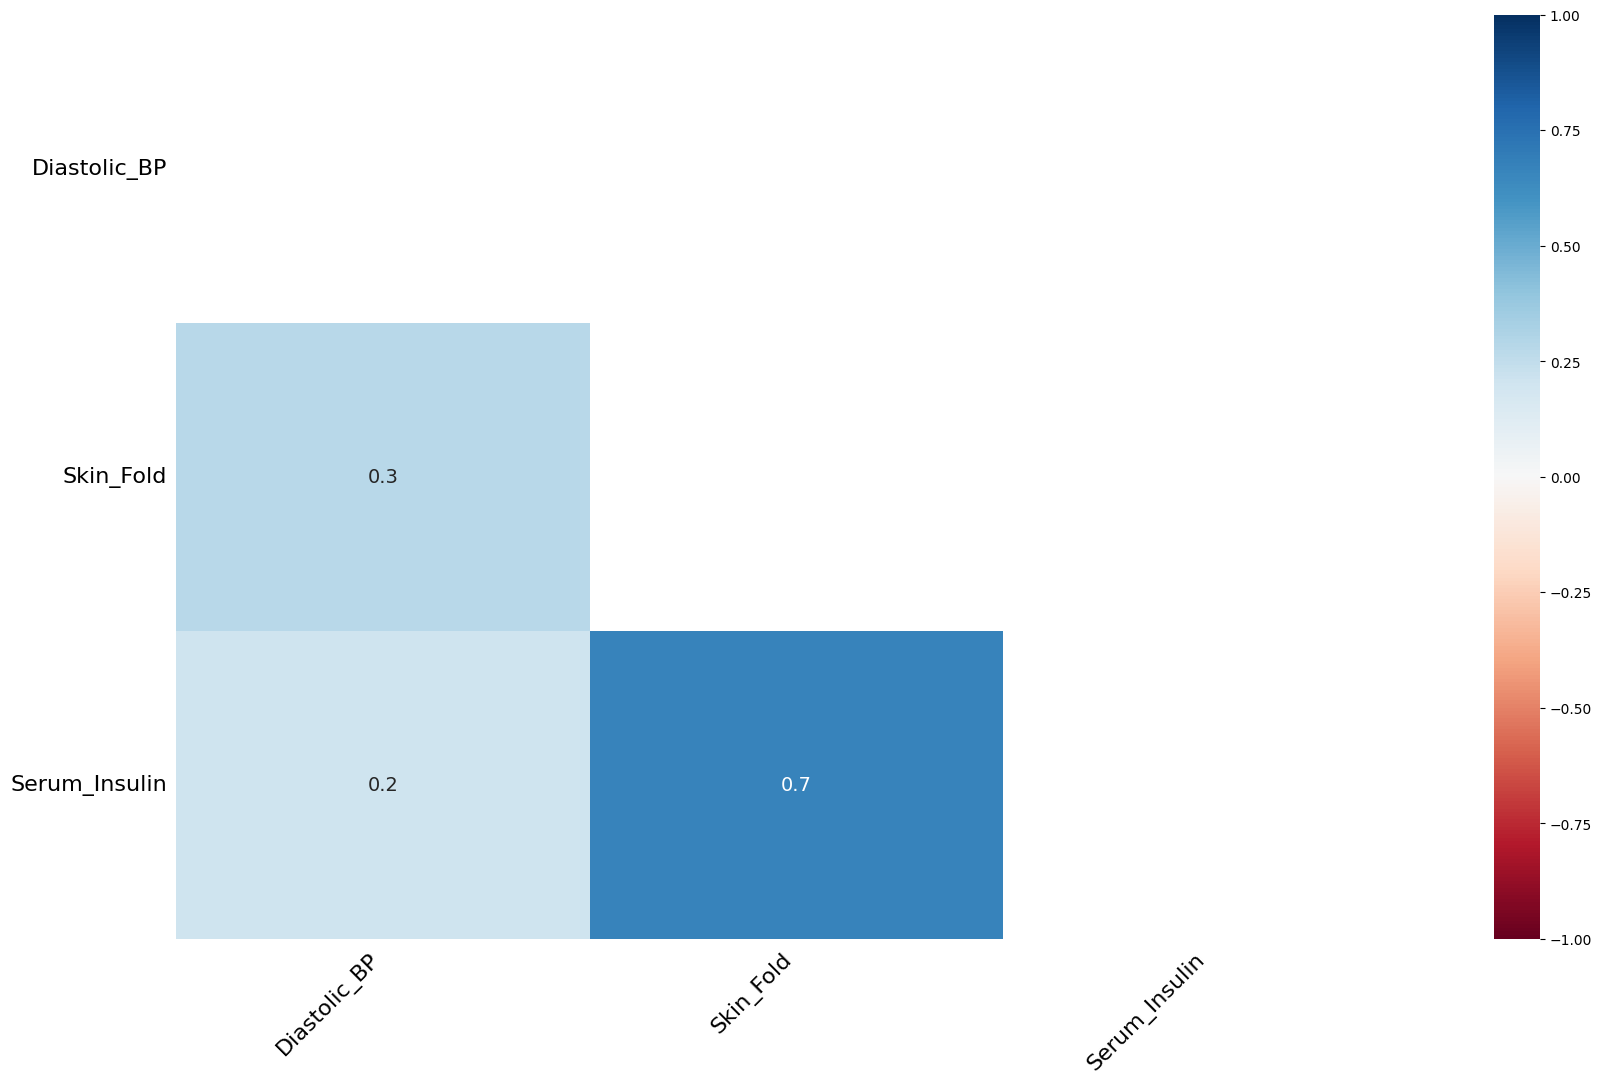

In [2]:
diabetes.dropna(subset=['BMI'], how='all', inplace=True)
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)
msno.heatmap(diabetes)
plt.show()


In [3]:
# !pip install scikit-learn

In [4]:
from sklearn.impute import SimpleImputer
# Make a copy of diabetes
diabetes_mean = diabetes.copy(deep=True)

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

##
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

In [5]:
##
# Make a copy of diabetes
diabetes_mode = diabetes.copy(deep=True)

# Create mode imputer object
mode_imputer = SimpleImputer(strategy="most_frequent")

# Impute using most frequent value in the DataFrame mode_imputer
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

##
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create median imputer object
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

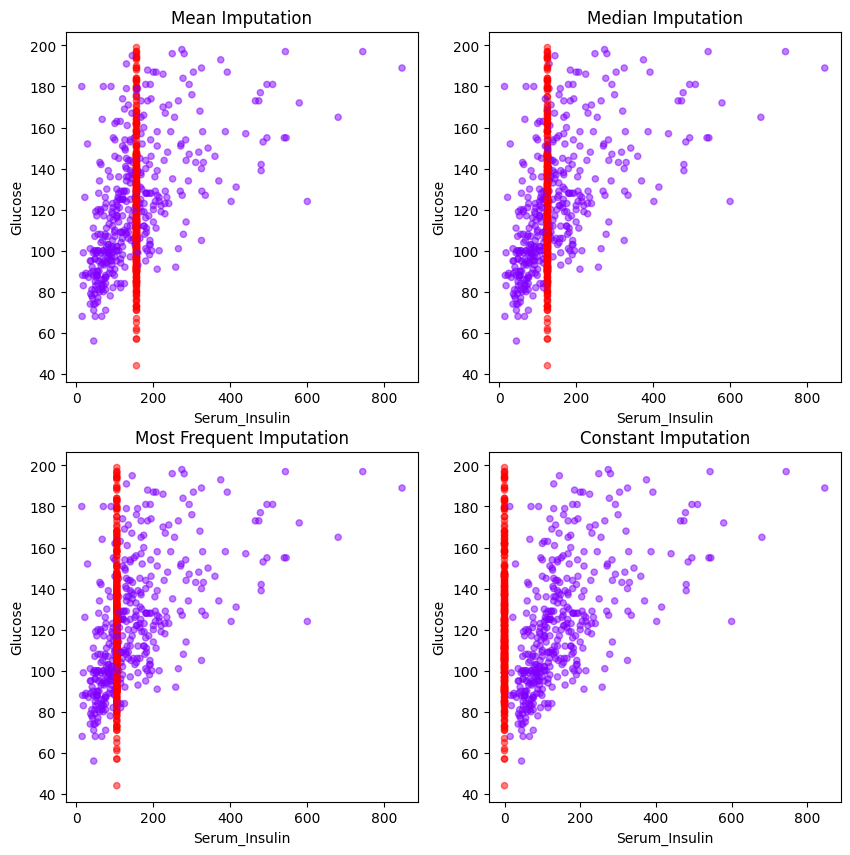

In [6]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes.Serum_Insulin.isnull()+diabetes.Glucose.isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()

In [7]:
##
main_airquality = airquality.copy(deep=True)
# Print prior to imputing missing values
print(airquality[30:40])

# Fill NaNs using forward fill
# airquality.fillna(method='ffill', inplace=True)
airquality.ffill( inplace=True)

# Print after imputing missing values
print(airquality[30:40])

##
# Print prior to imputing missing values
# print(airquality[30:40])
airquality = main_airquality.copy(deep=True)
# Fill NaNs using backward fill
# airquality.fillna(method='bfill', inplace=True)
airquality.bfill( inplace=True)

# Print after imputing missing values
print(airquality[30:40])

          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01    NaN  286.0   8.6    78
32  1976-06-02    NaN  287.0   9.7    74
33  1976-06-03    NaN  242.0  16.1    67
34  1976-06-04    NaN  186.0   9.2    84
35  1976-06-05    NaN  220.0   8.6    85
36  1976-06-06    NaN  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08    NaN  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90
          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01   37.0  286.0   8.6    78
32  1976-06-02   37.0  287.0   9.7    74
33  1976-06-03   37.0  242.0  16.1    67
34  1976-06-04   37.0  186.0   9.2    84
35  1976-06-05   37.0  220.0   8.6    85
36  1976-06-06   37.0  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08   29.0  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90
          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01  

In [8]:
##
# Print prior to imputing missing values
# print(airquality[30:40])
airquality = main_airquality.copy(deep=True)

# Coerce DataFrame to appropriate dtypes
# airquality = main_airquality.infer_objects(copy=False)
# Fill NaNs using linear interpolation
airquality.interpolate(method='linear', inplace=True)
linear = airquality.copy(deep=True)

# Print after imputing missing values
print(airquality[30:40])


          Date      Ozone  Solar  Wind  Temp
30  1976-05-31  37.000000  279.0   7.4    76
31  1976-06-01  35.857143  286.0   8.6    78
32  1976-06-02  34.714286  287.0   9.7    74
33  1976-06-03  33.571429  242.0  16.1    67
34  1976-06-04  32.428571  186.0   9.2    84
35  1976-06-05  31.285714  220.0   8.6    85
36  1976-06-06  30.142857  264.0  14.3    79
37  1976-06-07  29.000000  127.0   9.7    82
38  1976-06-08  50.000000  273.0   6.9    87
39  1976-06-09  71.000000  291.0  13.8    90


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_17424\2082003034.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airquality.interpolate(method='linear', inplace=True)


In [9]:
# Print prior to interpolation
# print(airquality[30:40])
airquality = main_airquality.copy(deep=True)
# Interpolate the NaNs quadratically
airquality.interpolate(method = 'quadratic', inplace=True)
quadratic = airquality.copy(deep=True)

# Print after interpolation
print(airquality[30:40])

          Date      Ozone  Solar  Wind  Temp
30  1976-05-31  37.000000  279.0   7.4    76
31  1976-06-01 -38.361123  286.0   8.6    78
32  1976-06-02 -79.352735  287.0   9.7    74
33  1976-06-03 -85.974836  242.0  16.1    67
34  1976-06-04 -62.354606  186.0   9.2    84
35  1976-06-05 -33.255133  220.0   8.6    85
36  1976-06-06  -2.803598  264.0  14.3    79
37  1976-06-07  29.000000  127.0   9.7    82
38  1976-06-08  62.155660  273.0   6.9    87
39  1976-06-09  71.000000  291.0  13.8    90


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_17424\4241713306.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airquality.interpolate(method = 'quadratic', inplace=True)


In [10]:
# Print prior to interpolation
# print(airquality[30:40])
airquality = main_airquality.copy(deep=True)

# Interpolate the NaNs with nearest value
airquality.interpolate(method='nearest', inplace=True)
nearest = airquality.copy(deep=True)
# Print after interpolation
print(airquality[30:40])

          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01   37.0  286.0   8.6    78
32  1976-06-02   37.0  287.0   9.7    74
33  1976-06-03   37.0  242.0  16.1    67
34  1976-06-04   29.0  186.0   9.2    84
35  1976-06-05   29.0  220.0   8.6    85
36  1976-06-06   29.0  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08   29.0  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_17424\1675134162.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airquality.interpolate(method='nearest', inplace=True)


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_17424\2441999503.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_imputed = airquality.fillna(method='ffill')


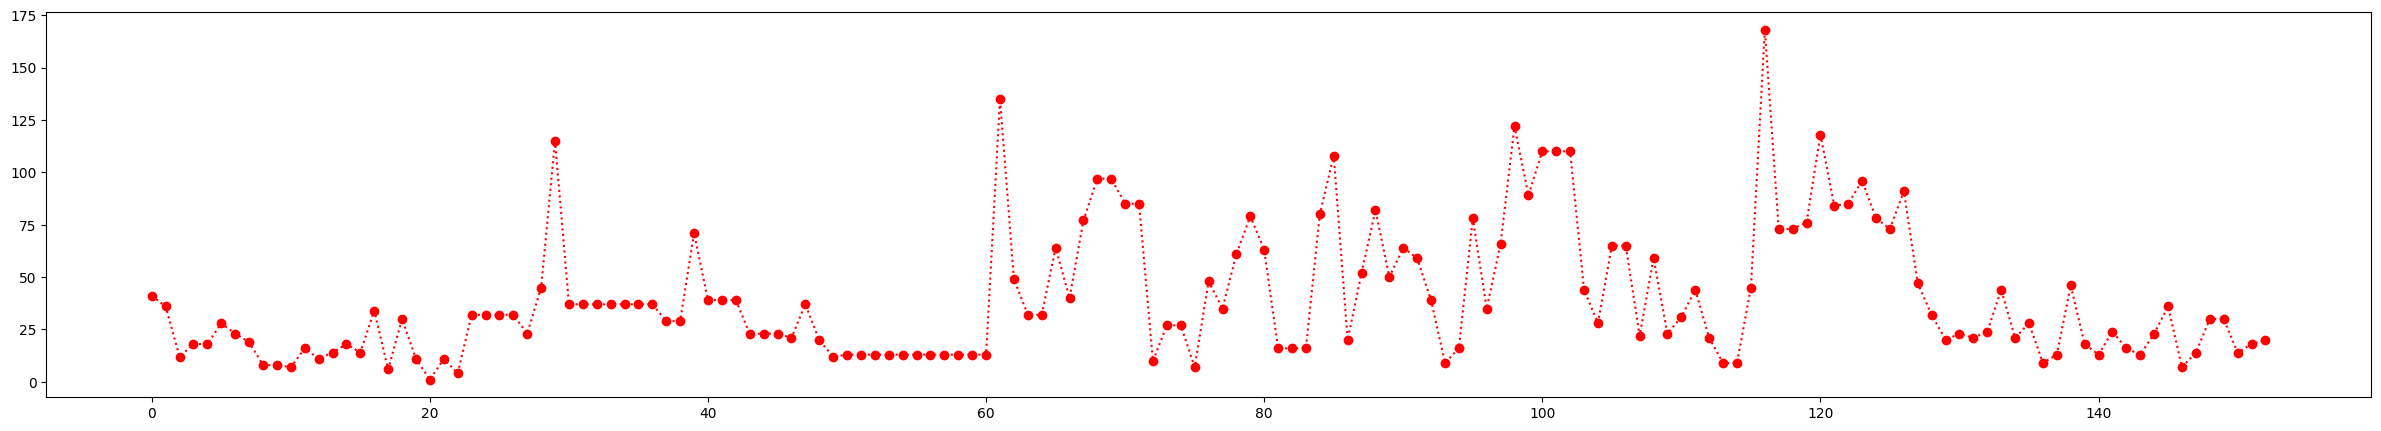

In [11]:
##
airquality = main_airquality.copy(deep=True)
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

plt.show()

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_17424\1792007054.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_imputed = airquality.fillna(method='ffill')


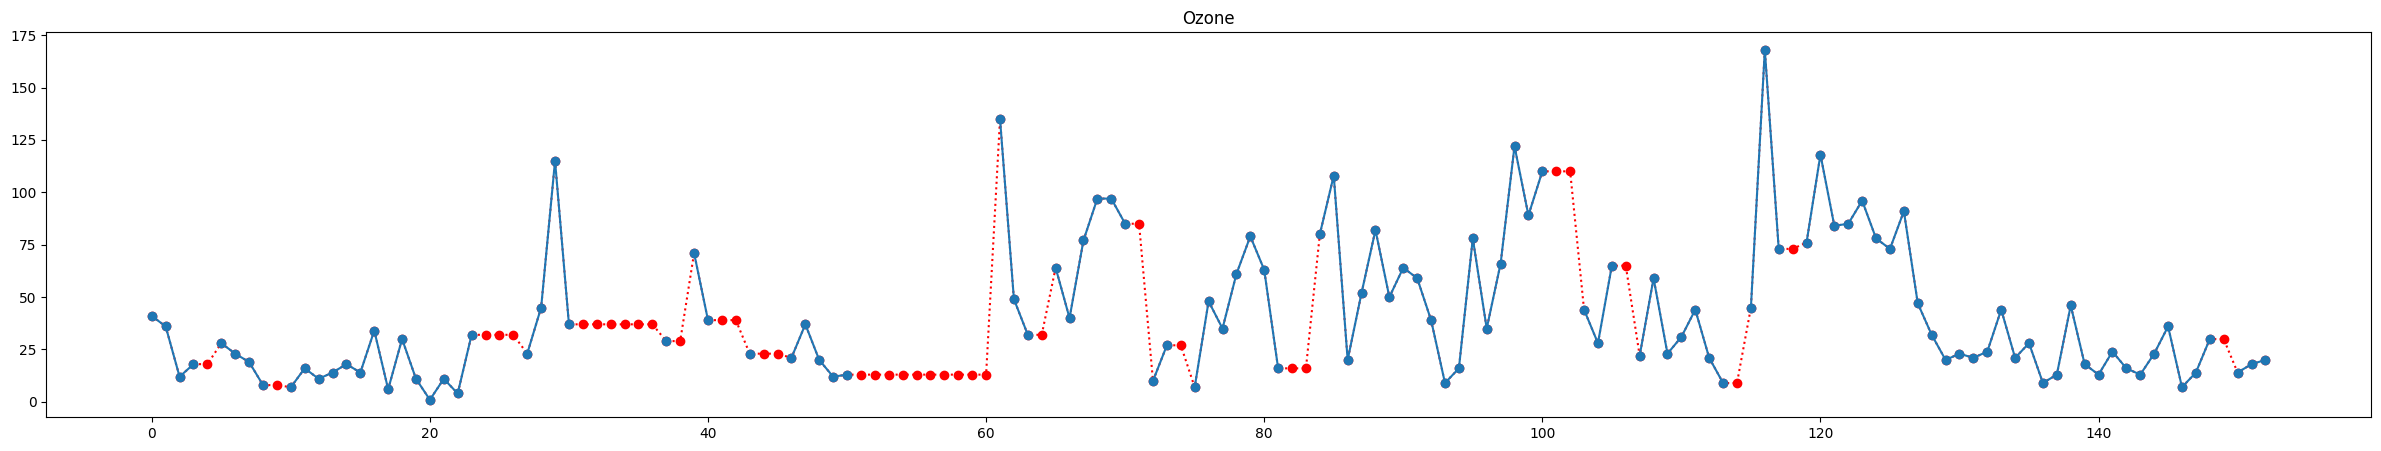

In [12]:


##
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))


# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_17424\3123066694.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfill_imputed = airquality.fillna(method='bfill')


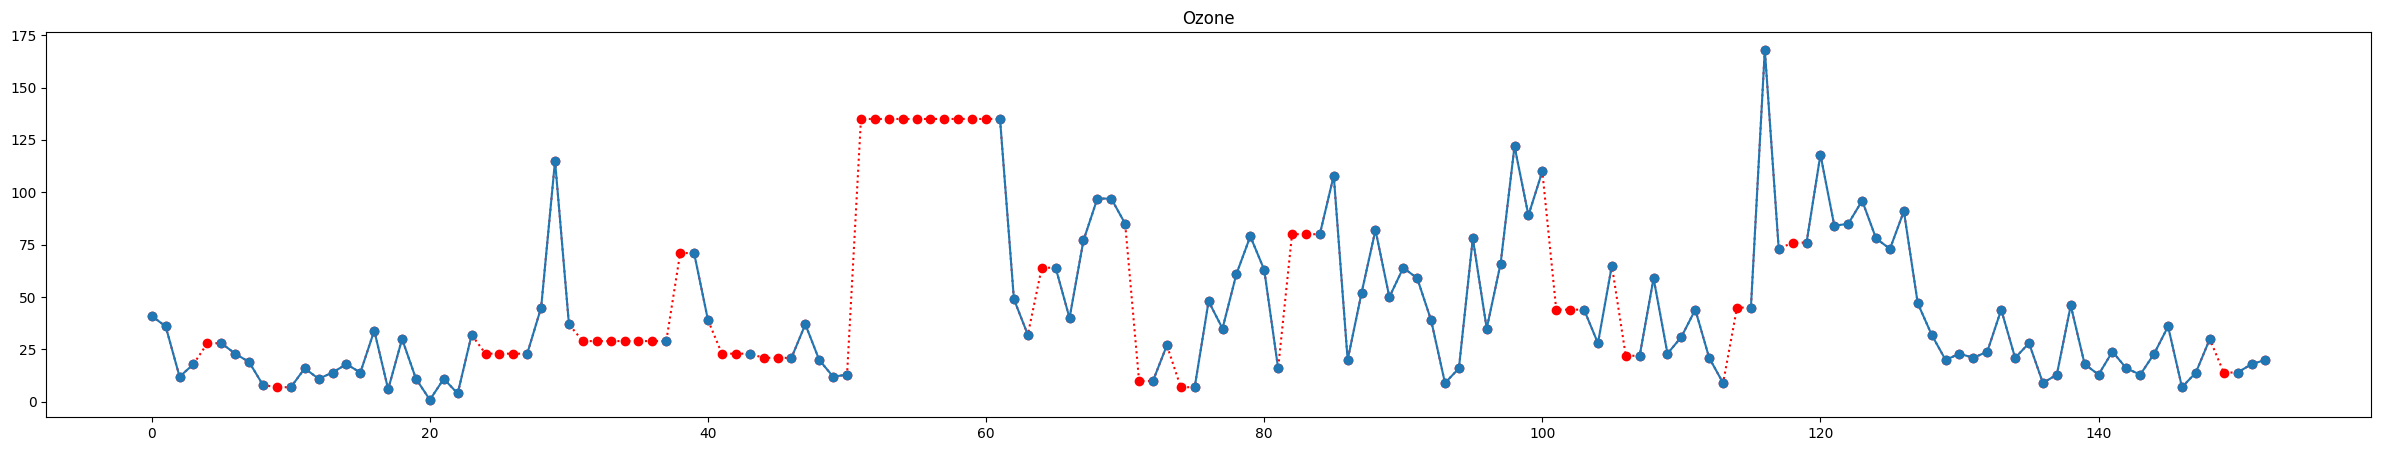

In [13]:
#  Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()


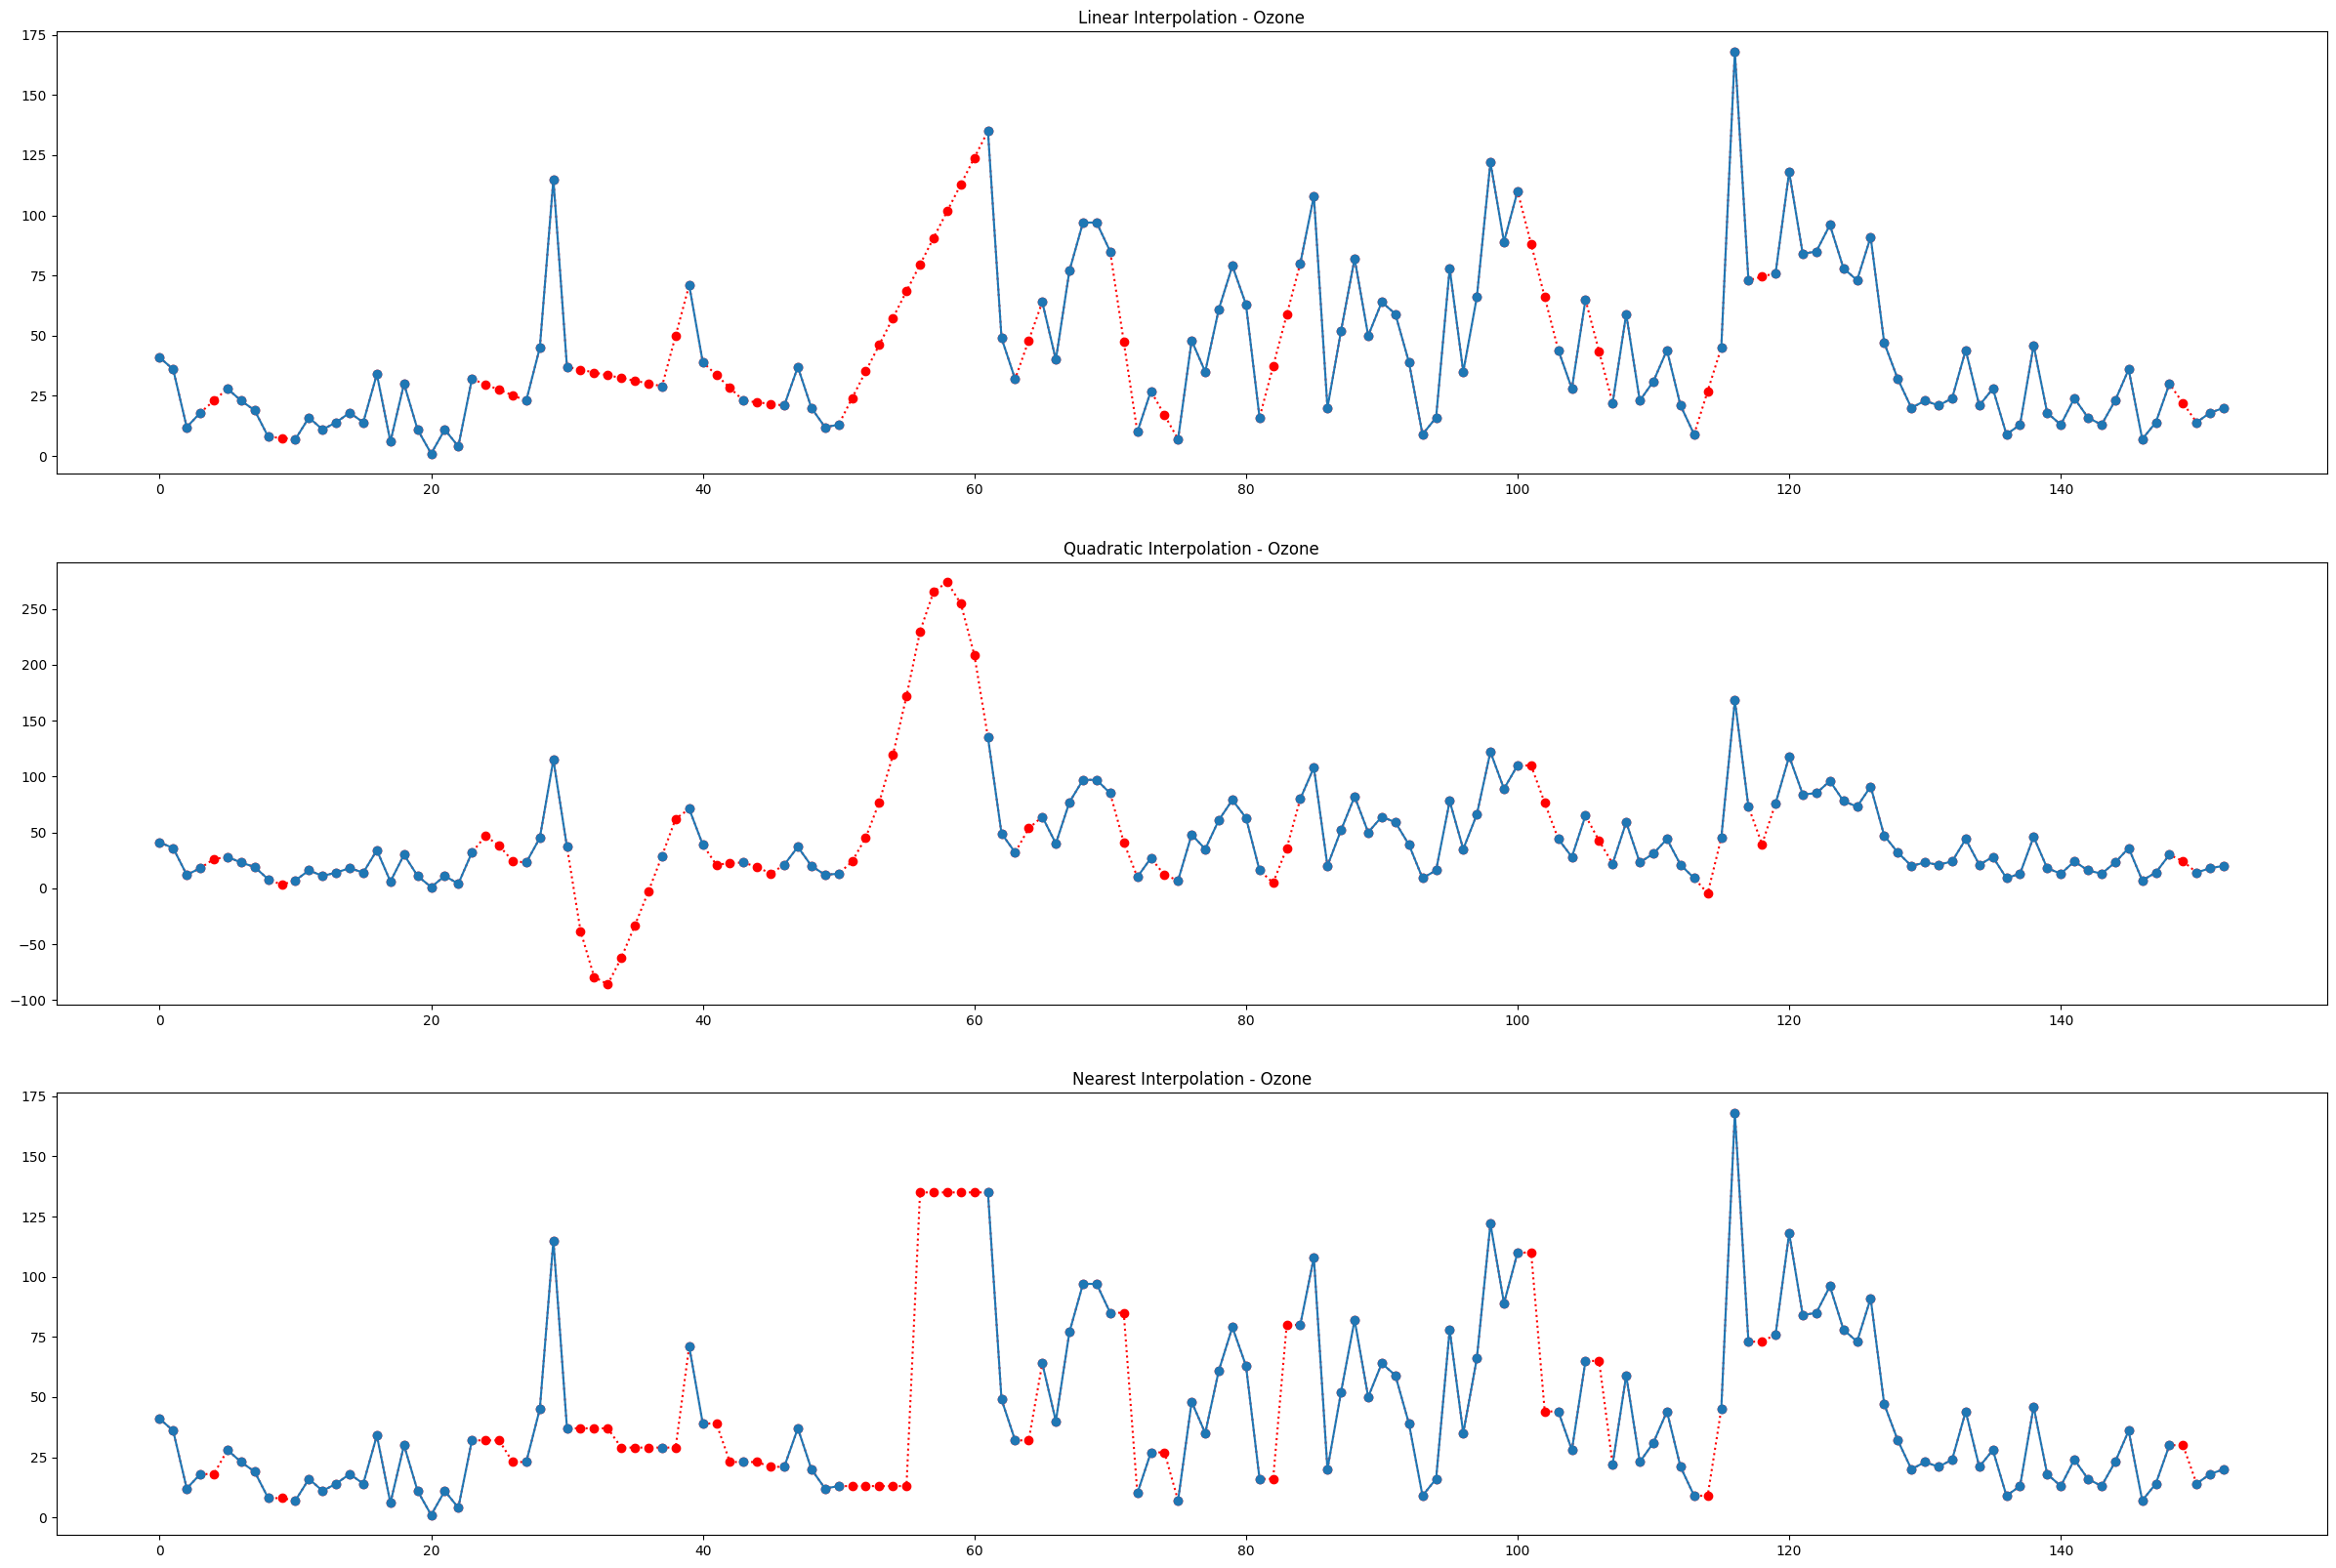

In [14]:
# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Linear Interpolation': linear, 'Quadratic Interpolation': quadratic, 
                  'Nearest Interpolation': nearest}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
  # Select and also set the title for a DataFrame
  interpolations[df_key].Ozone.plot(color='red', marker='o', 
                                 linestyle='dotted', ax=ax)
  airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)
  
plt.show()